In [257]:
# !pip3 install pandas;
# !pip3 install matplotlib;

import pandas as pd;
import matplotlib.pyplot as plt;

colnames=['HOST', 'PROTOCOL', 'CONNECTION_ID', 'INTERVAL_START', 'INTERVAL_END', 'TRANSFER', 'TRANSFER_UNIT', 'BANDWIDTH', 'BANDWIDTH_UNIT', 'JITTER', 'JITTER_UNIT', 'LOSS_PERCENT', 'LATENCY_AVG', 'LATENCY_MIN', 'LATENCY_MAX', 'LATENCY_STDEV', 'LATENCY_UNIT', 'PPS']; 
sdn_df = pd.read_csv('./network/custom/results/SDN/database_UDP.csv', names=colnames, header=0);
sdn_df = sdn_df[sdn_df['INTERVAL_END'] - sdn_df['INTERVAL_START'] == 1];
# sdn_df = sdn_df[sdn_df['INTERVAL_START'].gt(7)]
sdn_df = sdn_df[sdn_df['INTERVAL_END'].lt(31)]

trad_df = pd.read_csv('./network/custom/results/TRADITIONAL/database_UDP.csv', names=colnames, header=0);
trad_df = trad_df[trad_df['INTERVAL_END'] - trad_df['INTERVAL_START'] == 1]
# trad_df = trad_df[trad_df['INTERVAL_START'].gt(7)]
trad_df = trad_df[trad_df['INTERVAL_END'].lt(31)]

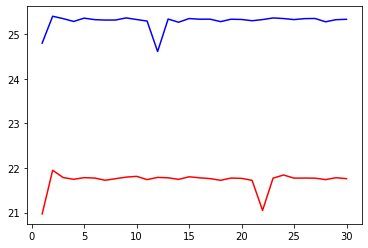

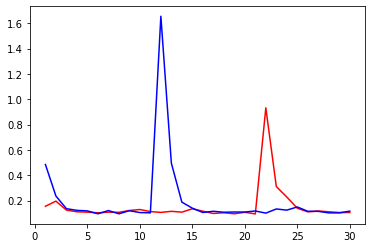

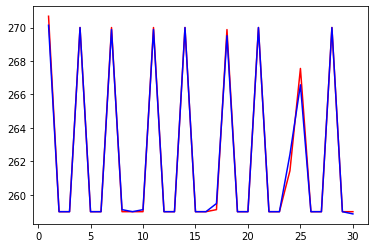

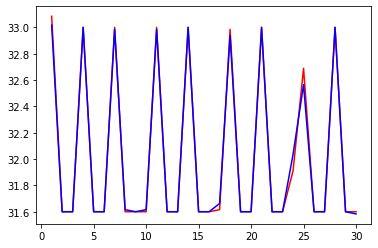

In [258]:

sdn_df_copy = sdn_df.copy();
trad_df_copy = trad_df.copy();

sdn_grouped = sdn_df_copy.groupby(by='INTERVAL_START')[['LATENCY_AVG']].mean();
# print(sdn_grouped.head())
# print(sdn_grouped.tail())
# fig, ax = plt.subplots();
# sdn_grouped.plot(ax=ax)

trad_grouped = trad_df_copy.groupby(by='INTERVAL_START')[['LATENCY_AVG']].mean();
# print(trad_grouped.head())
# print(trad_grouped.tail())
# fig, ax = plt.subplots();
# trad_grouped.plot(ax=ax)

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30];
plt.plot(x, sdn_grouped['LATENCY_AVG'], 'r') # plotting t, b separately 
plt.plot(x, trad_grouped['LATENCY_AVG'], 'b') # plotting t, c separately 
plt.show()

sdn_grouped = sdn_df_copy.groupby(by='INTERVAL_START')[['JITTER']].mean();
# print(sdn_grouped.head())
# print(sdn_grouped.tail())
# fig, ax = plt.subplots();
# sdn_grouped.plot(ax=ax)

trad_grouped = trad_df_copy.groupby(by='INTERVAL_START')[['JITTER']].mean();
# print(trad_grouped.head())
# print(trad_grouped.tail())
# fig, ax = plt.subplots();
# trad_grouped.plot(ax=ax)

plt.plot(x, sdn_grouped['JITTER'], 'r') # plotting t, b separately 
plt.plot(x, trad_grouped['JITTER'], 'b') # plotting t, c separately 
plt.show()


sdn_grouped = sdn_df_copy.groupby(by='INTERVAL_START')[['BANDWIDTH']].mean();
# print(sdn_grouped.head())
# print(sdn_grouped.tail())
# fig, ax = plt.subplots();
# sdn_grouped.plot(ax=ax)

trad_grouped = trad_df_copy.groupby(by='INTERVAL_START')[['BANDWIDTH']].mean();
# print(trad_grouped.head())
# print(trad_grouped.tail())
# fig, ax = plt.subplots();
# trad_grouped.plot(ax=ax)

plt.plot(x, sdn_grouped['BANDWIDTH'], 'r') # plotting t, b separately 
plt.plot(x, trad_grouped['BANDWIDTH'], 'b') # plotting t, c separately 
plt.show()

sdn_grouped = sdn_df_copy.groupby(by='INTERVAL_START')[['TRANSFER']].mean();
# print(sdn_grouped.head())
# print(sdn_grouped.tail())
# fig, ax = plt.subplots();
# sdn_grouped.plot(ax=ax)

trad_grouped = trad_df_copy.groupby(by='INTERVAL_START')[['TRANSFER']].mean();
# print(trad_grouped.head())
# print(trad_grouped.tail())
# fig, ax = plt.subplots();
# trad_grouped.plot(ax=ax)

plt.plot(x, sdn_grouped['TRANSFER'], 'r') # plotting t, b separately 
plt.plot(x, trad_grouped['TRANSFER'], 'b') # plotting t, c separately 
plt.show()

